# Ali Tehfe / Mini Project Scientific Computing 2022-2023
## Free surface Hydraulics and Sediment Transport

### A) Introduction:
The aim of this mini project is to study the case of minor bed river with steady/uniform flow of different river shape. Typical asked question is "how to calculate the water depth of different shape of river for a given discharge flow rates?". The widest range of application and most common friction calculation formula for free surface hydraulics is Manning-Strickler equation extracted from second Newton’s law. The idea is to calculate the height (h) by iteration to reach the appropriate (h) value. 

In this project, we have taken into account the froude number calculation, in order to evaluate the type of flow conditions in an open channel. Additionally, we have checked the sediment rate which is one of the important criterian in sediment transport by using different approach and formulas and provide a comparaison between those methods. Finally, we have plotted graphs using Matplotlib to figure out the relation between all required datas.

<img src="River.PNG" alt="Drawing" style="width: 600px;"/>



### B) Below are some definitions of Free Surface Hydraulics and Sediment Transport used for this study:

•	Cross sectional area: Area of the flow as if sectioned across the flow Aw (m2)

•	Wetted perimeter: Perimeter of the channel that is wet Pw (m)

•	Hydraulic radius: Ratio of the cross-sectional area on the wetted perimeter: Rh=Aw/Pw

•	Friction calculation / Manning-Strickler equation:  V =Ks. Rh^ (2/3). sqrt(S0) 
  
•	Q (flow rate m3/s) = Aw (m2). V(m/s)

•	S0: slope (%) at the river bottom 

•	Ks: Manning Strickler coefficient depends on the material. Study case - Ks is equal to 25 for natural bed.

•	V: velocity (m/s)

•	Q: Flow rate

• The variation of specific energy with depth at a constant discharge shows a minimum in the specific energy at a depth called
  critical depth at which the Froude number has a value of one. Critical depth is also the depth of maximum discharge, when the
  specific energy is held constant. 

• The Froude number is an important dimensionless parameter in open-channel flow. It represents the ratio of inertia forces to
  gravity forces. By other mean, it is the sqaure root of kinetic energy per potential energy. 
  




### 1) Calculation of Water Depth (h) for first case/ Rectangular shape river: 
•	Cross sectional area: Aw(h) = b(width)*h(height)

•	Pw(h) = 2h + b

•	Rh = bh/(2h+b)

•	Water Depth h = [(Q.[2h+b] ^(2/3))/(Ks.sqrt(S0).b^(5/3))]^(3/5)

<img src="Rectangle.PNG" alt="Drawing" style="width: 600px;"/>

In [136]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate
import pandas as pd
import math # importing "math" for mathematical operations

In [137]:
# Number of iteration
n_iter = 100  

# Error
err = 0.0001  

# Coefficients of Manning-Strickler formula
b = 8
Ks = 25
S0 = 0.01

# Flow rates to calculate for
Q = [0.1, 0.5, 1, 5, 10, 15, 20, 25, 50, 75]

# Initial flow depth
h0 = 0.5

# Number of flow rates
nQ = len(Q)

# Array to store calculated flow heights
h1 = np.zeros((nQ))

# Manning-Strickler formula
def manning_strickler(i, h0):
    return ((Q[i] * (2 * h0 + b) ** (2 / 3)) / (Ks * np.sqrt(S0) * b ** (5 / 3))) ** (3/ 5)

# List to store final results
data = []

# Iterate through flow rates
for i in range(nQ):
    # Iterate through number of iterations
    for j in range(n_iter):
        # Calculate flow height using Manning-Strickler formula
        h1[i] = manning_strickler(i, h0)
        # Check if calculated flow height is within acceptable error
        if (h1[i] - h0) <= err:
            # Append results to data list
            data.append([i+1, Q[i], h0, round(h1[i], 3), j+1])
            break
        h0 = h1[i]

# Print results in tabular format
print(tabulate(data, headers=["Index","Q Flow Rate (m3/s)", "h0 (m) Initial Depth","h1 (m) (Flow Height)","n_Iter"], tablefmt="fancy_grid"))


╒═════════╤══════════════════════╤════════════════════════╤════════════════════════╤══════════╕
│   Index │   Q Flow Rate (m3/s) │   h0 (m) Initial Depth │   h1 (m) (Flow Height) │   n_Iter │
╞═════════╪══════════════════════╪════════════════════════╪════════════════════════╪══════════╡
│       1 │                  0.1 │               0.5      │                  0.044 │        1 │
├─────────┼──────────────────────┼────────────────────────┼────────────────────────┼──────────┤
│       2 │                  0.5 │               0.5      │                  0.115 │        1 │
├─────────┼──────────────────────┼────────────────────────┼────────────────────────┼──────────┤
│       3 │                  1   │               0.5      │                  0.174 │        1 │
├─────────┼──────────────────────┼────────────────────────┼────────────────────────┼──────────┤
│       4 │                  5   │               0.5      │                  0.456 │        1 │
├─────────┼──────────────────────┼──────

### Plot Graph of the Relation between Flow rate and Water Depth using matplotlib 

In [138]:
plt.figure(figsize=(10,5))  # set the size of the plot
plt.title("Variation of Water Depth in respect to Given Flow Rate")  # set the title of the plot
plt.plot(Q, h1, label = "flow rate & Water Depth (Rectangular Shape River)", color = 'r', linestyle = '--', marker = 'o')  # create the plot with custom line color, style and markers on data points
plt.xlabel("$Q (m3/s)$") # set x-axis label
plt.ylabel("$h1 (m)$") # set y-axis label
plt.ylim(0,4) # set y-axis limit
plt.grid(True) # enable grid on the plot
plt.legend() # enable legend on the plot
plt.show() # show the plot


### 2) Calculation of Water Depth (h) second case/ Inclined shape river with angle Teta (Ɵ): 
•	Cross sectional area: Aw(h) = tan(Ɵ).h^2 + h.b

•	Pw(h) = 2.h/cos(Ɵ) + b

•	Rh = (h^2.tan(Ɵ) + h.b) / (2.h/cos(Ɵ) + b)

•	Water Depth h = [(Q. [2h/cos(Ɵ) + b] ^(2/3))/(Ks.sqrt(S0).(b + h.tan(Ɵ ))^(5/3))]^(3/5)

<img src="Inclined.PNG" alt="Drawing" style="width: 600px;"/>

In [139]:
# Number of iteration
n_iter = 100  

# Error
err = 0.001  

# Coefficients of Manning-Strickler formula
b = 6
Ks = 25
teta = 45  # degree
teta = (math.pi*teta) / 180  # convert to radians
S0 = 0.01

# Flow rates to calculate for
Q = [0.1, 0.5, 1, 5, 10, 15, 20, 25, 50, 75]

# Initial flow depth
h0 = 0.5

# Number of flow rates
nQ = len(Q)

# Array to store calculated flow heights
h2 = np.zeros((nQ))

# Manning-Strickler formula modified for channel slope
def manning_strickler(i, h0):
    return ((Q[i] * ((2 * h0) / math.cos(teta) + b) ** (2 / 3)) / (Ks * np.sqrt(S0) * (b + h0 * math.tan(teta)) ** (5 / 3))) ** (3 / 5)

# Initialize empty list to store results
data = []

# Iterate through flow rates
for i in range(nQ):
    # Iterate through number of iterations
    for j in range(n_iter):
        # Calculate flow height using modified Manning-Strickler formula
        h2[i] = manning_strickler(i, h0)
        # Check if calculated flow height is within acceptable error
        if (h2[i] - h0) <= err:
            data.append([i + 1, Q[i], h0, round(h2[i], 3), j + 1])
            break
        h0 = h2[i]

# Use tabulate to create a table from the results
print(tabulate(data, headers=["Index","Q Flow Rate (m3/s)", "h0 (m) Initial Depth", "h2 (m) (Flow Height)", "n_Iter"], tablefmt="fancy_grid"))


╒═════════╤══════════════════════╤════════════════════════╤════════════════════════╤══════════╕
│   Index │   Q Flow Rate (m3/s) │   h0 (m) Initial Depth │   h2 (m) (Flow Height) │   n_Iter │
╞═════════╪══════════════════════╪════════════════════════╪════════════════════════╪══════════╡
│       1 │                  0.1 │               0.5      │                  0.05  │        1 │
├─────────┼──────────────────────┼────────────────────────┼────────────────────────┼──────────┤
│       2 │                  0.5 │               0.5      │                  0.131 │        1 │
├─────────┼──────────────────────┼────────────────────────┼────────────────────────┼──────────┤
│       3 │                  1   │               0.5      │                  0.198 │        1 │
├─────────┼──────────────────────┼────────────────────────┼────────────────────────┼──────────┤
│       4 │                  5   │               0.519674 │                  0.52  │        2 │
├─────────┼──────────────────────┼──────

### Plot Graph of the Relation between Flow rate and Water Depth using matplotlib 

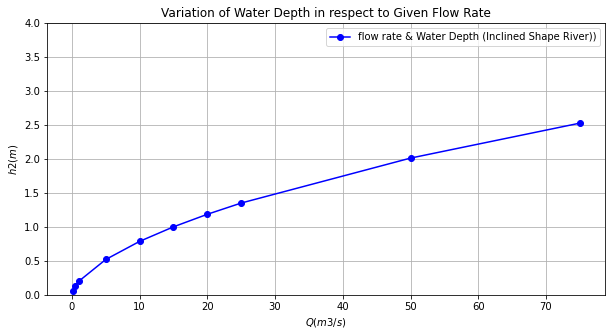

In [140]:
plt.figure(figsize=(10,5))  # set the size of the plot
plt.title("Variation of Water Depth in respect to Given Flow Rate")  # set the title of the plot
plt.plot(Q, h2, label = "flow rate & Water Depth (Inclined Shape River))", color = 'b', linestyle = '-', marker = 'o')  # create the plot with custom line color, style and markers on data points
plt.xlabel("$Q (m3/s)$") # set x-axis label
plt.ylabel("$h2 (m)$") # set y-axis label
plt.ylim(0,4) # set y-axis limit
plt.grid(True) # enable grid on the plot
plt.legend() # enable legend on the plot
plt.show() # show the plot

### C) Critical Depth and Froude Number

The general equation for determining critical depths on the discharge flow rate and channel geometry is: 
(Q^2 * L) / (g*A(hc)^3) = 1 

Where:

• Q is the discharge flow rate in m3/s

• L is the top width of water surface in m

• g is the gravitational constante 9.81 m/s2

• A(hc) is the cross-sectional area of critical depth in m2

The Froude number, Fr, calculated by the flowing equation, is useful for evaluating the type of flow conditions in an open channel:
Fr = sqrt ((Q^2* L)/(g*A(h)^3)) = V / sqrt(g*Lc)

where:

• Q is the discharge flow rate in m3/s

• sqrt(g*Lc) is the velocity of a gravity wave of height Lc

• g is the gravitational constante 9.81 m/s2

• A(h) is the cross-sectional area of normal depth in m2

If Fr > 1.0, flow is supercritical; Torrential Flow which means that upstream controlled - information goes forward  
If Fr < 1.0, flow is subcritical; Fluvial Flow which means that a Downstream controlled - information goes backwards   
Fr = 1.0 for critical flow conditions

<img src="Froude.PNG" alt="Drawing" style="width: 700px;"/>

### 1) Calculation of Froude Number for first case/ Rectangular shape river:

In [141]:
# Constants for flow classification
CRITICAL_FLOW = 1.0
SUPERCRITICAL_FLOW = 1.0
SUBCRITICAL_FLOW = 1.0

# width of the channel and acceleration due to gravity 
L = 8 
g = 9.81

# Flow rates to calculate for
Q = [0.1, 0.5, 1, 5, 10, 15, 20, 25, 50, 75]

def froude_number(i, Q, h1, L, g):
    """
    Calculates the Froude number for a given flow rate and water depth.
    Args:
        i (int): current index of Q, h1 array
        Q (numpy array): flow rate
        h1 (numpy array): water depth
        L (float): width of channel
        g (float): acceleration due to gravity
    Returns:
        fr1 (float): Froude number
    """
    fr1 = Q[i] / ((L * h1[i]) * np.sqrt(g * h1[i]))
    return fr1

def main():
    """
    Entry point of the script, it calls the froude_number() to calculate Froude number
    and prints the flow conditions
    """
    # fr1 array to store Froude number for each flow rate
    nQ = len(Q)
    fr1 = np.zeros(nQ)    
    rows = []
    for i in range(nQ):
        fr1[i] = froude_number(i, Q, h1, L, g)
        
        # checks the Froude number to classify the flow
        if fr1[i] > SUPERCRITICAL_FLOW:
            flow_type = "supercritical / Torrential - upstream controlled"
        elif fr1[i] < SUBCRITICAL_FLOW:
            flow_type = "subcritical / Fluvial - downstream controlled"
        else:
            flow_type = "critical"
            
        rows.append([i+1, Q[i], round(fr1[i], 3), flow_type])
    df = pd.DataFrame(rows, columns=["index","Q (m3/s)", "Froude Number (Fr1)", "Flow Type / Classification"])
    # printing the output using tabulate
    print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))
    return fr1

if __name__ == '__main__':
    fr1 = main()

╒═════════╤════════════╤═══════════════════════╤═══════════════════════════════════════════════╕
│   index │   Q (m3/s) │   Froude Number (Fr1) │ Flow Type / Classification                    │
╞═════════╪════════════╪═══════════════════════╪═══════════════════════════════════════════════╡
│       1 │        0.1 │                 0.438 │ subcritical / Fluvial - downstream controlled │
├─────────┼────────────┼───────────────────────┼───────────────────────────────────────────────┤
│       2 │        0.5 │                 0.514 │ subcritical / Fluvial - downstream controlled │
├─────────┼────────────┼───────────────────────┼───────────────────────────────────────────────┤
│       3 │        1   │                 0.551 │ subcritical / Fluvial - downstream controlled │
├─────────┼────────────┼───────────────────────┼───────────────────────────────────────────────┤
│       4 │        5   │                 0.647 │ subcritical / Fluvial - downstream controlled │
├─────────┼────────────┼──────

### Plot Graph of the Relation between Flow rate (Q) and Froude Number (Fr1)

In [142]:
plt.figure(figsize=(10,5))  # set the size of the plot
plt.title("Variation of Froude Number in respect to Given Flow Rate")  # set the title of the plot
plt.plot(Q, fr1, label = "Flow rate & Froude Number (Rectangular Shape River))", color = 'r', linestyle = '--', marker = 'o')  # create the plot with custom line color, style and markers on data points
plt.xlabel("$Q (m3/s)$") # set x-axis label
plt.ylabel("$Froude Number (fr1)$") # set y-axis label
plt.ylim(0.2,1) # set y-axis limit
plt.grid(True) # enable grid on the plot
plt.legend() # enable legend on the plot
plt.show() # show the plot

### 2) Calculation of Froude Number for Inclined shape river with angle Teta (Ɵ): 

In [143]:
# Constants for flow classification
CRITICAL_FLOW = 1.0
SUPERCRITICAL_FLOW = 1.0
SUBCRITICAL_FLOW = 1.0

# width of the channel and acceleration due to gravity 
L = 8 
g = 9.81

def froude_numberfr2(i, Q, h2, L, g, teta):
    """
    Calculates the Froude number for a given flow rate and water depth.
    Args:
        i (int): current index of Q, h2 array
        Q (numpy array): flow rate
        h2 (numpy array): water depth
        L (float): width of channel
        g (float): acceleration due to gravity
        teta (float): angle of inclination
    Returns:
        fr2 (float): Froude number
    """
    fr2 = Q[i] / (((L * h2[i]) + ((np.tan(teta)) * h2[i]**2)) * np.sqrt(g * h2[i]))
    return fr2

def main():
    """
    Entry point of the script, it calls the froude_number() to calculate Froude number
    and prints the flow conditions
    """
    # fr2 array to store Froude number for each flow rate
    nQ = len(Q)
    fr2 = np.zeros(nQ)
    rows = []
    for i in range(nQ):
        fr2[i] = froude_numberfr2(i, Q, h2, L, g, teta) 
        
    if len(fr2) != len(Q):
        raise ValueError("fr2 and Q must have the same length")
    else:   
        for i in range(nQ):
            # checks the Froude number to classify the flow
            if fr2[i] > SUPERCRITICAL_FLOW:
                flow_type = "supercritical / Torrential - upstream controlled"
            elif fr2[i] < SUBCRITICAL_FLOW:
                flow_type = "subcritical / Fluvial - downstream controlled"
            else:
                flow_type = "critical"
            
            rows.append([i+1, Q[i], round(fr2[i], 3), flow_type])
        df = pd.DataFrame(rows, columns=["index","Q (m3/s)", "Froude Number (Fr2)", "Flow Type / Classification"])
        # printing the output using tabulate
        print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))
    return fr2
        
if __name__ == '__main__':
    fr2 =main()  
    
   

╒═════════╤════════════╤═══════════════════════╤═══════════════════════════════════════════════╕
│   index │   Q (m3/s) │   Froude Number (Fr2) │ Flow Type / Classification                    │
╞═════════╪════════════╪═══════════════════════╪═══════════════════════════════════════════════╡
│       1 │        0.1 │                 0.358 │ subcritical / Fluvial - downstream controlled │
├─────────┼────────────┼───────────────────────┼───────────────────────────────────────────────┤
│       2 │        0.5 │                 0.416 │ subcritical / Fluvial - downstream controlled │
├─────────┼────────────┼───────────────────────┼───────────────────────────────────────────────┤
│       3 │        1   │                 0.443 │ subcritical / Fluvial - downstream controlled │
├─────────┼────────────┼───────────────────────┼───────────────────────────────────────────────┤
│       4 │        5   │                 0.5   │ subcritical / Fluvial - downstream controlled │
├─────────┼────────────┼──────

### Plot Graph of the Relation between Flow rate (Q) and Froude Number (Fr2)

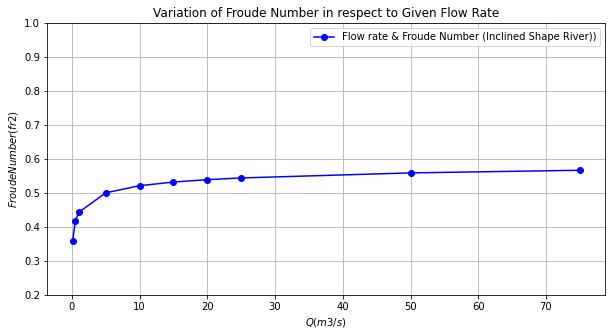

In [144]:
plt.figure(figsize=(10,5))  # set the size of the plot
plt.title("Variation of Froude Number in respect to Given Flow Rate")  # set the title of the plot
plt.plot(Q, fr2, label = "Flow rate & Froude Number (Inclined Shape River))", color = 'b', linestyle = '-', marker = 'o')  # create the plot with custom line color, style and markers on data points
plt.xlabel("$Q (m3/s)$") # set x-axis label
plt.ylabel("$Froude Number (fr2)$") # set y-axis label
plt.ylim(0.2,1) # set y-axis limit
plt.grid(True) # enable grid on the plot
plt.legend() # enable legend on the plot
plt.show() # show the plot

### 3) Study Increasing the Wetted Area with Same Flow Rates. We've Obtained Lower Value of Froude Numbers 

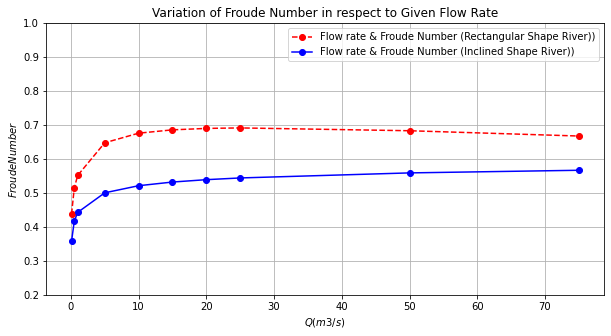

In [145]:
plt.figure(figsize=(10,5))  # set the size of the plot
plt.title("Variation of Froude Number in respect to Given Flow Rate")  # set the title of the plot
plt.plot(Q, fr1, label = "Flow rate & Froude Number (Rectangular Shape River))", color = 'r', linestyle = '--', marker = 'o')  # create the plot with custom line color, style and markers on data points
plt.plot(Q, fr2, label = "Flow rate & Froude Number (Inclined Shape River))", color = 'b', linestyle = '-', marker = 'o')  # create the plot with custom line color, style and markers on data points
plt.xlabel("$Q (m3/s)$") # set x-axis label
plt.ylabel("$Froude Number$") # set y-axis label
plt.ylim(0.2,1) # set y-axis limit
plt.grid(True) # enable grid on the plot
plt.legend() # enable legend on the plot
plt.show() # show the plot

### D) Sediment Rate Calculations Using the Formulas of Rickenmann, Meyer-Peter-Muller and Darcy Equations 

We will consider in this study a rectangular channel with a bed made of well sorted grains (only one size) at different flow rates (absolute values of flow rate m3/s) and slopes. 

#### D.1) Simplified Formula of Rickenman (1991)

<img src="Rickenmann.PNG" alt="Drawing" style="width: 600px;"/>

Where:

• qs/q is the equilibrium transport concentration (dimensioneless)

• qcr is the critical flow rate at the begining/ starting point (m2/s)

• S is the slope at the river bottom

• q is the flow rate per unit of width (m2/s)

• d50 is the grains diameter (m) 

• qs is the sediment flow rate per unit of width (m2/s)


In [157]:
# Define variables
b = 10 # River width
S = [0.03, 0.06, 0.09] # Slope of river
Q_new = [3, 30, 50] # Absolute Flow rates
d50 = 0.05 

# Get the number of Q_new and S values
nQ_new = len(Q_new)
nS = len(S)

# Initialize empty arrays for critical flow, flow, sediment rate, and equilibrium transport concentration
qcr = np.zeros([nQ_new, nS])
q = np.zeros([nQ_new, nS])
qsr = np.zeros([nQ_new, nS])
C = np.zeros([nQ_new, nS])

# Define a function to calculate the equilibrium transport concentration
def equilibrium_transport_concentration(i,j):
    return ((5.8 * S[j]**2) * (1 - qcr[i,j] / q[i,j]))

# Initialize list of rows
rows = []

# List of column labels
column_labels = ['Flow rate (m3/s)', 'Slope', 'Critical Flow qcr ($m2/s$)*', 'Concentration (C)', 'Sediment rate qs(m2/s)']

# Iterate through the values of Q_new and S
for i in range(nQ_new):
    for j in range(nS):
        # Calculate critical flow, flow, equilibrium transport concentration, and sediment rate
        qcr[i,j] = 0.47 * d50**(1.5) * S[j]**(-1.12)
        q[i,j] = Q_new[i]/b
        C[i, j] = equilibrium_transport_concentration(i,j)
        qsr[i, j] = q[i, j] * C[i, j]
        
        # Append current combination to list of rows
        rows.append([Q_new[i], S[j], round(qcr[i, j], 3), round(C[i, j], 3), round(qs[i, j], 4)])

# Print results in a tabular format
print(tabulate(rows, headers=column_labels, tablefmt='fancy_grid'))

╒════════════════════╤═════════╤═══════════════════════════════╤═════════════════════╤══════════════════════════╕
│   Flow rate (m3/s) │   Slope │   Critical Flow qcr ($m2/s$)* │   Concentration (C) │   Sediment rate qs(m2/s) │
╞════════════════════╪═════════╪═══════════════════════════════╪═════════════════════╪══════════════════════════╡
│                  3 │    0.03 │                         0.267 │               0.001 │                   0.0004 │
├────────────────────┼─────────┼───────────────────────────────┼─────────────────────┼──────────────────────────┤
│                  3 │    0.06 │                         0.123 │               0.012 │                   0.0042 │
├────────────────────┼─────────┼───────────────────────────────┼─────────────────────┼──────────────────────────┤
│                  3 │    0.09 │                         0.078 │               0.035 │                   0.0187 │
├────────────────────┼─────────┼───────────────────────────────┼─────────────────────┼──

#### D.2) Formula of Meyler-Peter and Muller (1948) modified by Wong and Parker (2006)

<img src="Meyer.PNG" alt="Drawing" style="width: 600px;"/>

Where:

• τ* is the non-dimensional shear stress

• Φ is the non-dimensional Einstein Parameter 

• qs is the sediment flow rate per unit of width (m2/s)

• d is the grain diameter (m)

• s is the relative density ~ 2.6-2.7 (i.e ratio between particle(sediment) density and fluid density) 



The first problem is to calculate the water depth h used in the shields number (non dimensional bottom water shear stress). This is to be done with a flow resistance (or friction) law. We will apply the manning strickler equation that we have used earlier to find h value. 

<img src="Manning.PNG" alt="Drawing" style="width: 500px;"/>

The second important parameter is to calculate the non-dimensional shear stress by applying this formula $τ* = (Rh\times S)  /  ((s-1)\times d)$.

Note: We consider in our case high slopes of bed load, which meaans low water depth. Accordingly, the hydraulic radius $Rh$ can be considered equal to water depth ($Rh = h$) and area A = b * h. The advantage of manning strickler formula is the strickler coefficient k does not depend of h. So it is easy to inverse the formula to isolate h.    






In [156]:
def manning_strickler(Q, S, k, b):
    return ((Q / (k * b * np.sqrt(S)))** (3/ 5))

def shear_stress(h, S, s, d):
    return (h * S) / ((s - 1) * d)

def einstein_parameter(taw):
    return 4 * (taw - 0.0495)**(3/2)

def sediment_rate(phi, s, g, d):
    return phi * np.sqrt((s - 1) * g * d**(3))

# Constants
b = 10  # River width
S = [0.03, 0.06, 0.09]  # Slope of river
Q_new = [3, 30, 50]  # Absolute Flow rates
d = 0.05  # Grain diameter
s = 2.65  # Relative density ratio
g = 9.81  # Gravitational constant (m/s2)

# Strickler coefficient
k = 21 / d**(1/6)

# Calculate the number of flow rates and slopes
nQ_new = len(Q_new)
nS = len(S)

# Initialize arrays for storing results
h = np.zeros([nQ_new, nS])
taw = np.zeros([nQ_new, nS])  # τ* non-dimensional shear stress
phi = np.zeros([nQ_new, nS])  # Φ non-dimensional Einstein Parameter
qsm = np.zeros([nQ_new, nS])

# List of column labels
column_labels = ['Flow rate (m3/s)', 'Slope', 'Water depth (h (m))', 'Shear stress τ*', 'Einstein parameter', 'Sediment rate qs(m2/s)']

# Initialize list of rows
rows = []

# Loop through all combinations of flow rates and slopes
for i, Q in enumerate(Q_new):
    for j, slope in enumerate(S):
        h[i, j] = manning_strickler(Q, slope, k, b)
        taw[i, j] = shear_stress(h[i, j], slope, s, d)
        phi[i, j] = einstein_parameter(taw[i, j])
        qsm[i, j] = sediment_rate(phi[i, j], s, g, d)       
        
        # Append current combination to list of rows
        rows.append([Q, slope, round(h[i, j], 3), round(taw[i, j], 3), round(phi[i, j], 4), round(qs[i, j], 4)])

# Print results in a tabular format
print(tabulate(rows, headers=column_labels, tablefmt='fancy_grid')) 


╒════════════════════╤═════════╤═══════════════════════╤═══════════════════╤══════════════════════╤══════════════════════════╕
│   Flow rate (m3/s) │   Slope │   Water depth (h (m)) │   Shear stress τ* │   Einstein parameter │   Sediment rate qs(m2/s) │
╞════════════════════╪═════════╪═══════════════════════╪═══════════════════╪══════════════════════╪══════════════════════════╡
│                  3 │    0.03 │                 0.166 │             0.06  │               0.0045 │                   0.0004 │
├────────────────────┼─────────┼───────────────────────┼───────────────────┼──────────────────────┼──────────────────────────┤
│                  3 │    0.06 │                 0.135 │             0.098 │               0.0427 │                   0.0042 │
├────────────────────┼─────────┼───────────────────────┼───────────────────┼──────────────────────┼──────────────────────────┤
│                  3 │    0.09 │                 0.119 │             0.13  │               0.0916 │            

#### D.3) Darcy-Weisbach Law with Recking Flow Resistance Relations

<img src="Darcy.PNG" alt="Drawing" style="width: 600px;"/>

Where:

• h/D is the roughness during low submergence

• $√(8/f)$ is the friction coefficient

Note: Same as Meyler above, We consider in our case high slopes of bed load, which meaans low water depth. Accordingly, the hydraulic radius  𝑅ℎ  can be considered equal to water depth ( 𝑅ℎ=ℎ ) and area A = b * h.

Additionally, we note hereby that in order to identify the type and limit of bedload in a sleep slopes-low submergence, we have to use the following limiation graph.

<img src="Bedload.PNG" alt="Drawing" style="width: 600px;"/>

where: 

• No Bedload means that no grains are moving and hence, no sediment has been transported

• Low rate means that small grains are moving and water is in shallow

• Full mobility means that grains are moving fast and water depth above bedload is high. 

The difficulty is that the exact value of water depth h is unknown, so an iterative calculation is needed. However, to simplify the process we may start with the h calculated with Manning-Strickler equation above. This mostly applicable to high flow rates.

In [177]:
def friction_coeficient_low_rate(S, j):
    return (-3.7 - 7.18 * np.log10(S[j]))

def friction_coeficient_no_bedload(h, d):
    return (2.5 + 9.5 * np.log10(h/d))

def friction_coeficient_full_mobility(h_m, d):
    return (-1 + 9.5 * np.log10(h_m/d))

def flow_discharge_law(Q_new, S, f, b, g, i, j):
    return ((Q_new[i] / (b * f * np.sqrt(S[j] * g)))**(2/ 3))

def manning_strickler(Q_new, S, ks, b, i, j):
    return ((Q_new[i] / (ks * b * np.sqrt(S[j])))** (3/ 5))

def shear_stress(h, S, s, d, j):
    return (h * S[j]) / ((s - 1) * d)

def einstein_parameter(taw):
    return 4 * (taw - 0.0495)**(3/2)

def sediment_rate(phi, s, g, d):
    return phi * np.sqrt((s - 1) * g * d**(3))

# Constants
b = 10  # River width
S = [0.03, 0.06, 0.09]  # Slope of river
Q_new = [3, 30, 50]  # Absolute Flow rates
d = 0.05  # Grain diameter
s = 2.65  # Relative density ratio
g = 9.81  # Gravitational constant (m/s2)
n_iter = 5  # Number of iteration
err = 0.01


# Calculate the number of flow rates and slopes
nQ_new = len(Q_new)
nS = len(S)

# Strickler coefficient
ks = 21 / d**(1/6)

# Initialize arrays for storing results
h_m = np.zeros([nQ_new, nS])
h = np.zeros([nQ_new, nS])
taw = np.zeros([nQ_new, nS])  # τ* non-dimensional shear stress
phi = np.zeros([nQ_new, nS])  # Φ non-dimensional Einstein Parameter
qsd = np.zeros([nQ_new, nS])
f_coef = np.zeros([nQ_new, nS]) # f_coef (√(8/f)) is the friction coefficient

# List of column labels
column_labels = ['Flow rate (m3/s)', 'Slope', 'Water depth (h (m))', 'Shear stress τ*', 'Einstein parameter', 'Sediment rate qs(m2/s)']

# Initialize list of rows
rows = []

# Loop through all combinations of flow rates and slopes
for i in range(nQ_new):
    for j in range(nS):        
        # Calculate friction coefficient using the flow discharge law
        f_coef[i, j] = friction_coeficient_low_rate(S, j)

        # Calculate water depth using the flow discharge law
        h[i, j] = flow_discharge_law(Q_new, S, f_coef[i, j], b, g, i, j)
        
        if (h[i, j] / d) < 0.52 * S[j]**(-0.76) and (h[i, j] / d) > 0.223 * S[j]**(-0.76):            
            # Calculate non-dimensional shear stress
            taw[i, j] = shear_stress(h[i, j], S, s, d, j)
            
            # Calculate non-dimensional Einstein parameter
            phi[i, j] = einstein_parameter(taw[i, j])
            
            # Calculate sediment rate
            qsd[i, j] = sediment_rate(phi[i, j], s, g, d)
            
        else:
            for k in range(n_iter):
                # Calculate water depth using Manning-Strickler equation
                h_m[i, j] = manning_strickler(Q_new, S, ks, b, i, j)
                f_coef[i, j] = friction_coeficient_full_mobility(h_m[i,j], d) 
                h[i, j] = flow_discharge_law(Q_new, S, f_coef[i, j], b, g, i, j)

                if (h[i, j] - h_m[i, j]) <= err:
                    break
                h_m[i, j] = h[i, j]               
        taw[i, j] = shear_stress(h[i, j], S, s, d, j)
        phi[i, j] = einstein_parameter(taw[i, j])
        qsd[i, j] = sediment_rate(phi[i, j], s, g, d)    
                           

        # Append current combination to list of rows
        rows.append([Q_new[i], S[j], round(h[i, j], 3), round(taw[i, j], 3), round(phi[i, j], 4), round(qs[i, j], 4)])

# Print results in a tabular format
print(tabulate(rows, headers=column_labels, tablefmt='fancy_grid'))


╒════════════════════╤═════════╤═══════════════════════╤═══════════════════╤══════════════════════╤══════════════════════════╕
│   Flow rate (m3/s) │   Slope │   Water depth (h (m)) │   Shear stress τ* │   Einstein parameter │   Sediment rate qs(m2/s) │
╞════════════════════╪═════════╪═══════════════════════╪═══════════════════╪══════════════════════╪══════════════════════════╡
│                  3 │    0.03 │                 0.18  │             0.065 │               0.0081 │                   0.0004 │
├────────────────────┼─────────┼───────────────────────┼───────────────────┼──────────────────────┼──────────────────────────┤
│                  3 │    0.06 │                 0.181 │             0.132 │               0.0943 │                   0.0042 │
├────────────────────┼─────────┼───────────────────────┼───────────────────┼──────────────────────┼──────────────────────────┤
│                  3 │    0.09 │                 0.248 │             0.27  │               0.4153 │            

#### D.4) Comparaison of Output Data Between the Three Calculated Methods

In [183]:
plt.figure(figsize=(14,6))  # set the size of the plot
plt.title("Variation of Sediment Rate in respect to Given Flow Rate and Slope S(3%)")  # set the title of the plot
plt.plot(Q_new, qsd[:,0], label = "Flow rate & Sediment Rate (Darcy-Weisbach))", color = 'r', linestyle = '--', marker = 'o')  # create the plot with custom line color, style and markers on data points
plt.plot(Q_new, qsr[:,0], label = "Flow rate & Sediment Rate (Rickenmann-1991))", color = 'b', linestyle = '-', marker = 'o')  # create the plot with custom line color, style and markers on data points
plt.plot(Q_new, qsm[:,0], label = "Flow rate & Sediment Rate (Meyer & Muller))", color = 'g', linestyle = '-', marker = 'o')  # create the plot with custom line color, style and markers on data points

plt.xlabel("$Q (m3/s)$") # set x-axis label
plt.ylabel("Sediment rate qs$(m^2/s)$") # set y-axis label
# plt.ylim(0.2,1) # set y-axis limit
plt.grid(True) # enable grid on the plot
plt.legend() # enable legend on the plot
plt.show() # show the plot

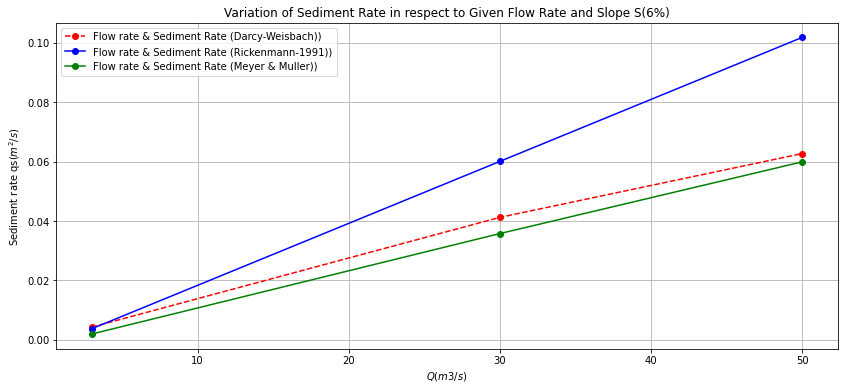

In [184]:
plt.figure(figsize=(14,6))  # set the size of the plot
plt.title("Variation of Sediment Rate in respect to Given Flow Rate and Slope S(6%)")  # set the title of the plot
plt.plot(Q_new, qsd[:,1], label = "Flow rate & Sediment Rate (Darcy-Weisbach))", color = 'r', linestyle = '--', marker = 'o')  # create the plot with custom line color, style and markers on data points
plt.plot(Q_new, qsr[:,1], label = "Flow rate & Sediment Rate (Rickenmann-1991))", color = 'b', linestyle = '-', marker = 'o')  # create the plot with custom line color, style and markers on data points
plt.plot(Q_new, qsm[:,1], label = "Flow rate & Sediment Rate (Meyer & Muller))", color = 'g', linestyle = '-', marker = 'o')  # create the plot with custom line color, style and markers on data points

plt.xlabel("$Q (m3/s)$") # set x-axis label
plt.ylabel("Sediment rate qs$(m^2/s)$") # set y-axis label
# plt.ylim(0.2,1) # set y-axis limit
plt.grid(True) # enable grid on the plot
plt.legend() # enable legend on the plot
plt.show() # show the plot

In [186]:
plt.figure(figsize=(14,6))  # set the size of the plot
plt.title("Variation of Sediment Rate in respect to Given Flow Rate and Slope S(9%)")  # set the title of the plot
plt.plot(Q_new, qs[:,2], label = "Flow rate & Sediment Rate (Darcy-Weisbach))", color = 'r', linestyle = '--', marker = 'o')  # create the plot with custom line color, style and markers on data points
plt.plot(Q_new, qsr[:,2], label = "Flow rate & Sediment Rate (Rickenmann-1991))", color = 'b', linestyle = '-', marker = 'o')  # create the plot with custom line color, style and markers on data points
plt.plot(Q_new, qsm[:,2], label = "Flow rate & Sediment Rate (Meyer & Muller))", color = 'g', linestyle = '-', marker = 'o')  # create the plot with custom line color, style and markers on data points

plt.xlabel("$Q (m3/s)$") # set x-axis label
plt.ylabel("Sediment rate qs$(m^2/s)$") # set y-axis label
# plt.ylim(0.2,1) # set y-axis limit
plt.grid(True) # enable grid on the plot
plt.legend() # enable legend on the plot
plt.show() # show the plot

#### D.5) Conclusion:

Three methods were utilized to determine the sediment transport rate (qs) by examining the results of three flow rates on three different slopes. The findings revealed that:
- For a small slope, the variation in sediment rate was similar when using all three methods. 
- Steeper slopes, the variation became more pronounced at higher flow rates, with Rickenmann estimates indicating a sediment transport rate that was approximately twice that of the other methods
